In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 04

## Percentiles 

Suppose we wanted to manually compute the 55th percentile of the following array:

In [5]:
x = make_array(43, 20, 51, 7, 28)
x

array([43, 20, 51,  7, 28])

**Step 1.** To compute percentiles we first sort the data

In [6]:
sorted_x = np.sort(x) # EXERCISE
sorted_x

array([ 7, 20, 28, 43, 51])

In [10]:
100* (np.arange(0, len(x))+1)/len(x)

array([  20.,   40.,   60.,   80.,  100.])

In [7]:
# add sorted_x to a table
# create two columns
# percentile: 
ptbl = Table().with_columns(
    "Percentile", 100*(np.arange(0, len(x))+1)/len(x),
    "Element", sorted_x)
ptbl

Percentile,Element
20,7
40,20
60,28
80,43
100,51


**Step 2.** Figure out where the $p^\text{th}$ percentile would be.

In [15]:
p = 55
ind = int(np.round(p/100 * len(x))) - 1 # EXERCISE
ind

2

In [16]:
sorted_x.item(ind)

28

The above calculation is confusing and brittle (try p=0).  Instead, we should use the `percentile` function.

### Using the Percentile Function

In [17]:
percentile?

Signature: percentile(p, arr=None)
Docstring:
Returns the pth percentile of the input array (the value that is at
least as great as p% of the values in the array).

If arr is not provided, percentile returns itself curried with p

>>> percentile(74.9, [1, 3, 5, 9])
5
>>> percentile(75, [1, 3, 5, 9])
5
>>> percentile(75.1, [1, 3, 5, 9])
9
>>> f = percentile(75)
>>> f([1, 3, 5, 9])
5
File:      /opt/conda/lib/python3.11/site-packages/datascience/util.py
Type:      function

Recall the precentile table. 

In [18]:
ptbl

Percentile,Element
20,7
40,20
60,28
80,43
100,51


Let's try a few values.

In [19]:
percentile(50, x)

28

In [20]:
percentile(55, x)

28

In [21]:
percentile(0, x)

7

In [22]:
percentile(100, x)

51

In [25]:
x # percentile, sorts for us and finds the appropriate percentile based on the length of the list/array


array([43, 20, 51,  7, 28])

In [29]:
s = [1,7,3,9,5]
percentile(s) == 0
percentile(39,s) == percentile(40,s) 
percentile(40,s) == percentile(41,s) 
percentile(50,s) == 5

# do each of these make sense to you?

True

---
<center> Return to Slides </center>

---

## Discussion Question

In [30]:
s = make_array(1, 3, 5, 7, 9)

In [31]:
Table().with_columns(
    "Percentile", 100*(np.arange(0, len(s))+1)/len(s),
    "Element", sorted(s))

Percentile,Element
20,1
40,3
60,5
80,7
100,9


In [ ]:
percentile(10, s) == 0

In [ ]:
percentile(39, s) == percentile(40, s)

In [ ]:
percentile(40, s) == percentile(41, s)

In [ ]:
percentile(50, s) == 5

---
<center> Return to Slides </center>

---

## Inference: Estimation

To demonstrate the process of estimating a parameter, let's examine the 2019 San Francisco public records.  We obtained this data from the [SF Open Data Portal](https://datasf.org/opendata/).  For the purposes of this exercise, we will assume that this a census of the compensation data: that it contains the compensation for a public workers.  

In [32]:
sf = Table().read_table('data/san_francisco_2019.csv')
sf.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


Suppose we are interested in studying `"Total Compensation"`.  Let's make a histogram of the total compensation.

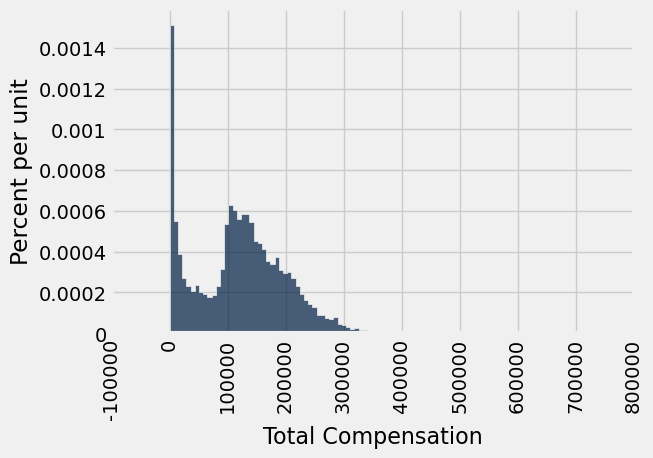

In [33]:
sf.hist('Total Compensation', bins = 100)
# see lots and lots of people make between $0 - 75,000
# # see lots of people make between $100,000 - 200,000
# i don't see anything near the 800,000 mark but since my histogram chooses the x-axis by default (according to what's in my sf table)
# i'm guessing a handful of people make upwards towards that $800,000 mark


Who is getting paid the most?

In [34]:
sf.sort('Total Compensation', descending = True)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235
Community Health,Public Health,Administrative & Mgmt (Unrep),"Physician Administrator, DPH",434966,0,119213,554179
Public Protection,Sheriff,Correction & Detention,Senior Deputy Sheriff,152153,315896,77275,545324
General Administration & Finance,Retirement Services,Management,Director,397392,0,108913,506305
Community Health,Public Health,Medical & Dental,Supervising Physician Spec,404701,0,99480,504181
Community Health,Public Health,Medical & Dental,Senior Physician Specialist,400992,0,97428,498421


Who is getting paid the least?

In [40]:
sf.sort('Total Compensation', descending = False).show(30)
# all these people below are getting $0 in salary and benefits
# should we avoid these jobs then? do these jobs mean they really make no money?
# or is it missing data? vacancy
# data scientist - understand and explain the oddities that come up in your data

# fire fighter made no compensation
# fire fighters travel to fight fires, sometimes beyond county lines
# domain expertise is critical
# we are NOT domain experts or experts of this data set


Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Sub-Professional Engineering,StdntDsgn Train2/Arch/Eng/Plng,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Clerical, Secretarial & Steno",Executive Secretary 1,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Payroll, Billing & Accounting",Senior Account Clerk,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0


There is a clear spike around **zero**!  Why?

We will focus on those that worked at least 20 hours at minimum wage for an entire year. 

In [45]:
min_salary = 15 * 20 * 50 # $15/hr, 20 hr/wk, 50 weeks
print("Min Salary", min_salary)

sf = sf.where('Salary', are.above(min_salary)) # EXERCISE filter total compensation above min_salary
sf.sort('Total Compensation', descending = False)

Min Salary 15000


Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
"Public Works, Transportation & Commerce",Municipal Transportation Agcy,Sub-Professional Engineering,"StdntDsgnTrain1, Arch/Eng/Plng",15578,0,41,15619
Public Protection,Trial Courts,Untitled,Superior Court Judge,15414,0,224,15637
Culture & Recreation,Recreation And Park Commission,Recreation,Recreation Coordinator,15016,0,1180,16196
"Public Works, Transportation & Commerce",Municipal Transportation Agcy,Protection & Apprehension,School Crossing Guard,15053,0,1168,16221
Human Welfare & Neighborhood Development,Human Services,Public Service Aide,Public Service Trainee,15008,0,1230,16238
Culture & Recreation,Recreation And Park Commission,Recreation,Recreation Leader,15081,0,1171,16252
Culture & Recreation,Fine Arts Museum,Protection & Apprehension,Museum Guard,15093,0,1171,16264
Culture & Recreation,Fine Arts Museum,Protection & Apprehension,Security Guard,15105,0,1172,16277
Culture & Recreation,Recreation And Park Commission,Recreation,Recreation Leader,15108,0,1173,16281
Community Health,Public Health,Nursing,Nursing Assistant,15119,12,1158,16289


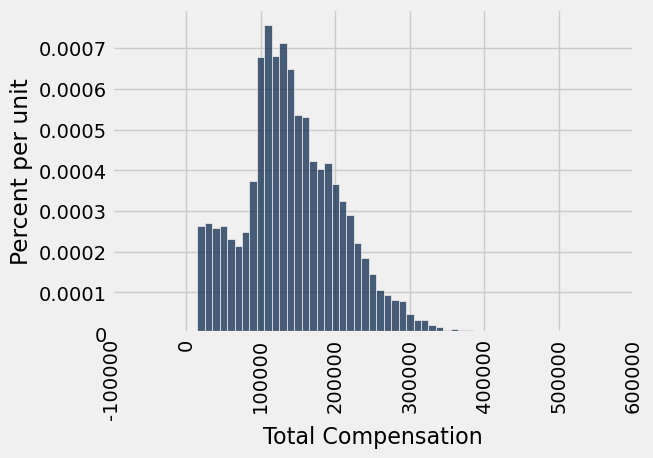

In [46]:
salary_bins = np.arange(min_salary, 500000, 10000)
sf.hist("Total Compensation", bins=salary_bins)

### The Population Parameter

Here we have access to the population so we can compute parameters directly.  

For example, suppose we were interested in the median compensation.  Then we could compute it directly on our data:

In [47]:
pop_median = percentile(50, sf.column("Total Compensation"))
pop_median

135747.0

In most real-world settings, you won't have access to the population.  Instead, you will take a random sample. 

Suppose we sample 400 people from our population.

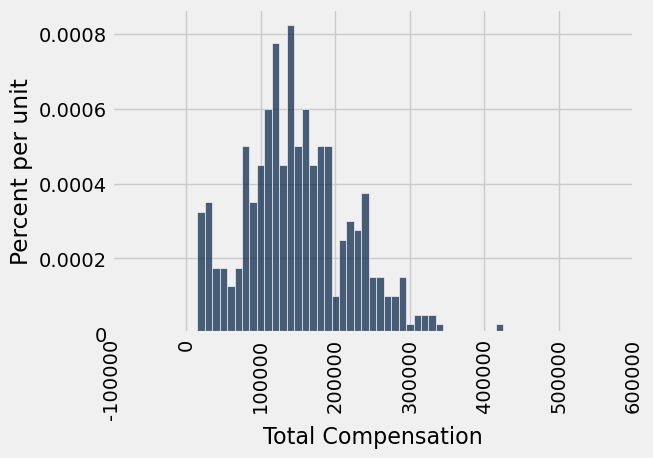

In [67]:
# An Empirical Distribution
our_sample = sf.sample(400, with_replacement = False) # EXERCISE: sample 400 from population
our_sample.hist('Total Compensation', bins=salary_bins)

We can use the sample median (statistic) as an estimate of the parameter value.

In [68]:
# Estimate: Median of a Sample
# median is the 50th percentile (middle of all my values)
percentile(50, our_sample.column('Total Compensation'))

141359.0

In [50]:
#np.median also gives us the median
np.median(our_sample.column('Total Compensation'))
#sample statistic is
# $130,659
# sample statistic is an estimate for our population parameter
# most of the time in the real-world, we won't ever know what the true population parameter is
# although it is a fixed, unknown number

130659.5

In [51]:
np.median(sf.column('Total Compensation'))
# true median (paramater) of our population is $135,747

135747.0

But in the real world we won't be able to keep going back to the population. How do we generate a new random sample *without going back to the population?*

---
<center> Return to Slides </center>

---

## Variability of the Estimate

If we could get additional samples from the population, how much variability would their be in our estimate of the median?

In [69]:
def generate_sample_median(samp_size):
    our_sample = sf.sample(samp_size, with_replacement = False) # EXERCISE: sample 400 from population # EXERCISE
    return percentile(50, our_sample.column('Total Compensation'))

In [74]:
generate_sample_median(400)

134211.0

## Quantifying Uncertainty

Because we have access to the population, we can simulate many samples from the population:

In [75]:
sample_medians = make_array() # initialize an empty array here
# so i can collect stuff inside my for loop

for i in np.arange(1_000):
    # Exercise
    one_samp_med = generate_sample_median(400)
    sample_medians = np.append(sample_medians, one_samp_med)

In [76]:
len(sample_medians) # should be 1_000

1000

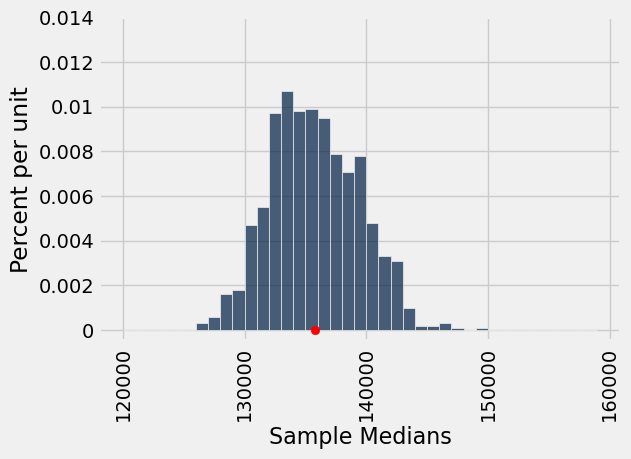

In [77]:
med_bins = np.arange(120000, 160000, 1000)
Table().with_column('Sample Medians', sample_medians).hist(bins=med_bins)

plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color='red');

What happens if we do the same thing again with slightly larger samples?

In [78]:
sample_medians2 = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(800)
    sample_medians2 = np.append(sample_medians2, new_median)

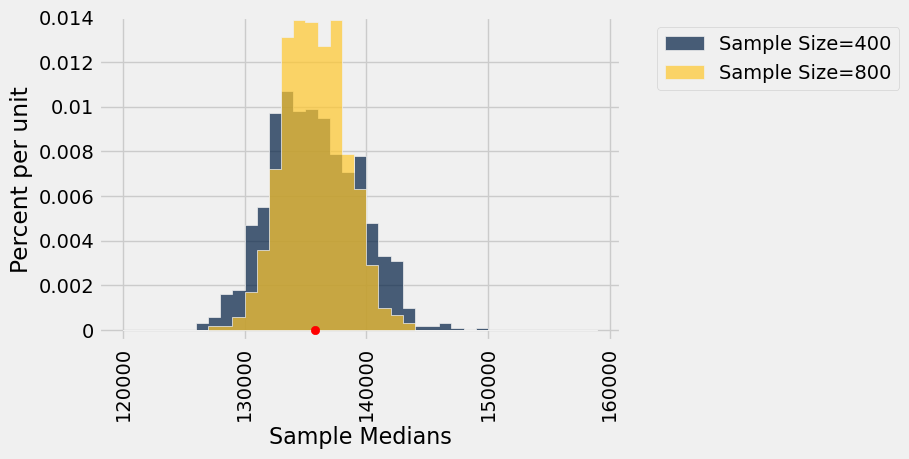

In [79]:
(Table()
     .with_columns("Sample Medians", sample_medians,
                   "Sample Size", 400)
     .append(Table().with_columns("Sample Medians", sample_medians2,
                                  "Sample Size", 800))
     .hist("Sample Medians", group="Sample Size", bins=med_bins)
)
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color='red');

# what happens when we increase the sample size
# describe what you see in the histogram below
# how sample size affects our estimates

###
#
#

But in the real world we won't be able to keep going back to the population. How do we generate a new random sample *without going back to the population?*

---
<center> Return to Slides </center>

---

# Bootstrap

Sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

**Step 1:** Sample the original sample **With Replacement** the same number of times as the original sample size.

```python
table.sample() # All you need!
```

The default behavior of tbl.sample:
1. at random with replacement,
2. the same number of times as rows of tbl

In [86]:
our_sample # size of 400\
our_sample.group('Job').sort('count', descending = True)

Job,count
Transit Operator,23
Registered Nurse,16
Deputy Sheriff,8
Firefighter,8
HSA Sr Eligibility Worker,8
Patient Care Assistant,8
Special Nurse,8
Police Officer 2,7
Sergeant 3,7
Porter,6


In [85]:
bootstrap_sample.group('Job').sort('count', descending = True)# are there duplicates since we sample WITH replacement?

Job,count
Transit Operator,37
Registered Nurse,19
Attorney (Civil/Criminal),10
Firefighter,10
Patient Care Assistant,10
Assoc Engineer,8
HSA Sr Eligibility Worker,8
Porter,8
Special Nurse,8
Manager II,7


In [82]:
bootstrap_sample = our_sample.sample() # EXERCISE
print("Number of Rows:", bootstrap_sample.num_rows)

Number of Rows: 400


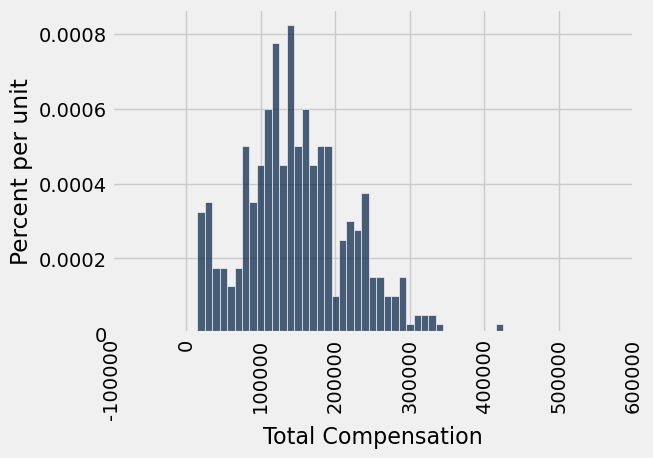

In [88]:
our_sample.hist('Total Compensation', bins=salary_bins)

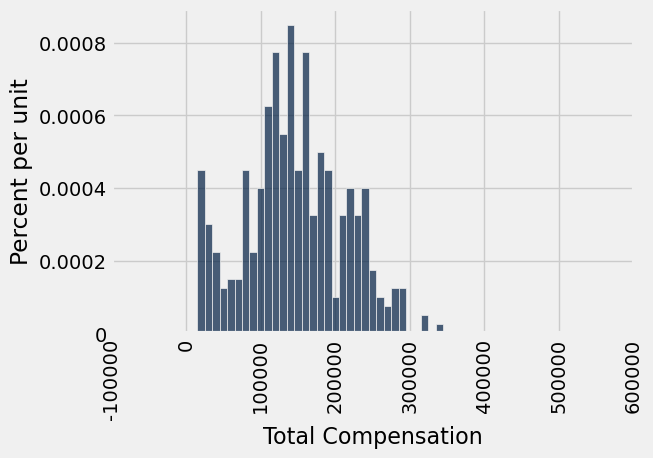

In [87]:
bootstrap_sample.hist('Total Compensation', bins=salary_bins)

**Step 2:** Compute statistic on bootstrap sample.

In [89]:
percentile(50, bootstrap_sample.column('Total Compensation'))

140360.0

In [90]:
percentile(50, our_sample.column('Total Compensation'))

141359.0

In [ ]:
# why does this work?
# bootstrap sample has a bunch of duplicate entries....??
# but our histograms do have a similar center and spread
#
#

**Repeat** the sampling process many times:

In [94]:
def one_bootstrap_median():
    # draw the bootstrap sample
    bootstrap_sample = our_sample.sample()  # Exercise
    # return the median total compensation in the bootstrap sample
    return percentile(50, bootstrap_sample.column('Total Compensation'))

In [98]:
one_bootstrap_median()

146680.0

In [99]:
# Generate the medians of 1000 bootstrap samples
num_repetitions = 1000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

Examine the empirical distribution of the samples.

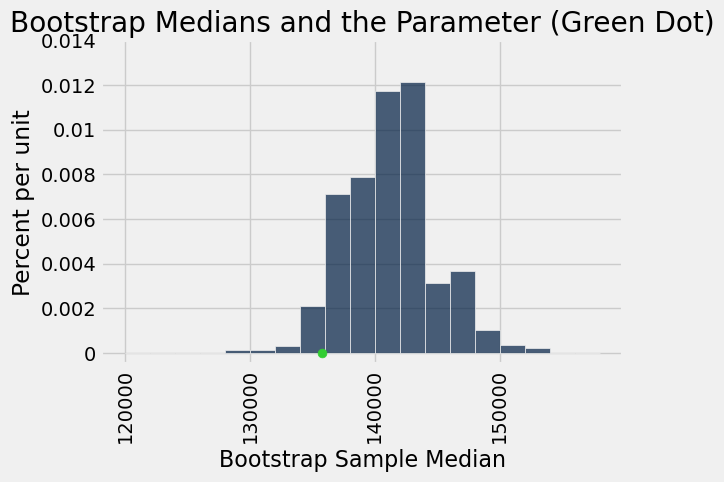

In [100]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

### A General Bootstrap Function

The following function implements the general bootstrap procedure.


In [ ]:
def bootstrapper(sample, statistic, num_repetitions):
    """
    Returns the statistic computed on a num_repetitions  
    bootstrap samples from sample.
    """
    bstrap_stats = make_array()
    for i in np.arange(num_repetitions):
        # Step 1: Sample the Sample
        bootstrap_sample = ... # EXERCISE
        # Step 2: compute statistics on the sample of the sample
        bootstrap_stat = ... # EXERCISE
        # Accumulate the statistics
        bstrap_stats = np.append(bstrap_stats, bootstrap_stat)

    return bstrap_stats    

In [ ]:
og_sample = sf.sample(400)

def compute_median(sample):
    return percentile(50, sample.column("Total Compensation"))

bootstrap_medians = bootstrapper(og_sample, compute_median, 1000)

In [ ]:
(Table().with_column("bootstraps", bootstrap_medians)
        .hist(bins=median_bins))

## Extra Viz code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

---
<center> Return to Slides </center>

---

## Percentile Method: Middle 95% of the Bootstrap Estimates 

Computing confidence intervals is as simple as computing percentiles on the bootstrap samples.  No magic equations!

In [ ]:
left = ... # EXERCISE 2.5 percentile
right = ... # EXERCISE 97.5 percentile 

make_array(left, right)

In [ ]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.000005, 0.00014)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);